# image processing with [OpenCV](https://opencv.org/)

### Python 기반 주요 이미지 라이브러리
- PIL(Python Image Library)
    - 주로 이미지 처리만을 위해 사용
    - 처리 성능이 상대적으로 느려 잘 사용하지 않음
- Scikit Image
    - 파이썬 기반의 전반적인 컴퓨터 비전 기능 제공
    - 사이파이([Scipy](https://scipy.org/)) 기반
- OpenCV(Open source Computer Vision)
    - 영상 처리에 사용할 수 있는 오픈 소스 라이브러리
    - C++ 기반이나 Python도 공식적으로 지원

### OpenCV 이미지 처리 이해 및 타 패키지 비교

In [1]:
!mkdir ./data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

mkdir: ./data: File exists
--2023-09-04 14:18:54--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 383118 (374K) [image/jpeg]
저장 위치: `./data/beatles01.jpg'

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    /  0.04s   

2023-09-04 14:18:54 (9.20 MB/s) - `./data/beatles01.jpg' 저장함 [383118/383118]



**PIL 패키지를 이용하여 이미지 로드**

- `open(image file)`: image file을 읽어서 ImageFile객체로 생성

image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>


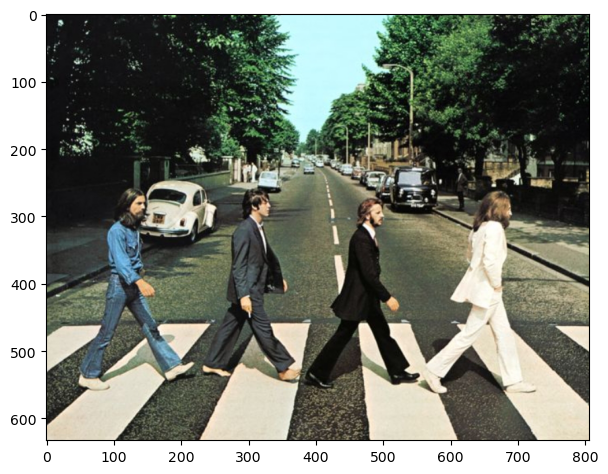

In [ ]:
import matplotlib.pyplot as plt
import os

from PIL import Image

pil_image = Image.open('./data/beatles01.jpg')
print('image type:', type(pil_image))

plt.figure(figsize=(7, 7))
plt.imshow(pil_image)
plt.show()

**Skimage로 이미지 로드**

- `imread()`: RGB 원본 이미지를 RGB 형태의 numpy array로 반환

sk_image type: <class 'numpy.ndarray'>  sk_image shape: (633, 806, 3)


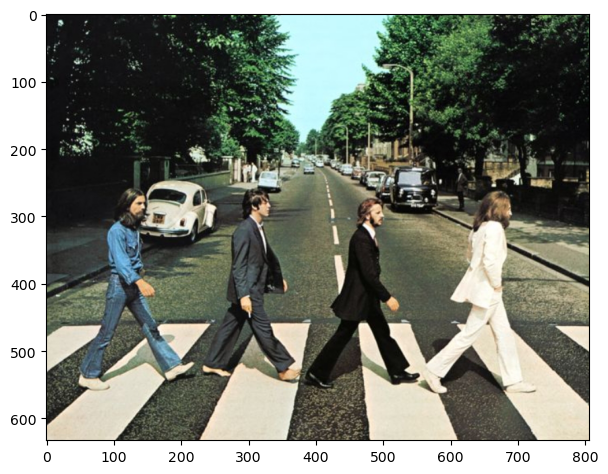

In [ ]:
from skimage import io

sk_image = io.imread('./data/beatles01.jpg')
print('sk_image type:', type(sk_image), ' sk_image shape:', sk_image.shape)

plt.figure(figsize=(7, 7))
plt.imshow(sk_image)
plt.show()

**OpenCV로 이미지 로드**

- `imread()`: 원본 RGB 이미지를 BGR 형태의 numpy array로 반환
- `imwrite()`: BGR 형태의 이미지 배열을 파일에 기록할 때 다시 RGB 형태로 반환

cv_image type: <class 'numpy.ndarray'>  cv_image shape: (633, 806, 3)
img type: <class 'numpy.ndarray'>  img shape: (633, 806, 3)


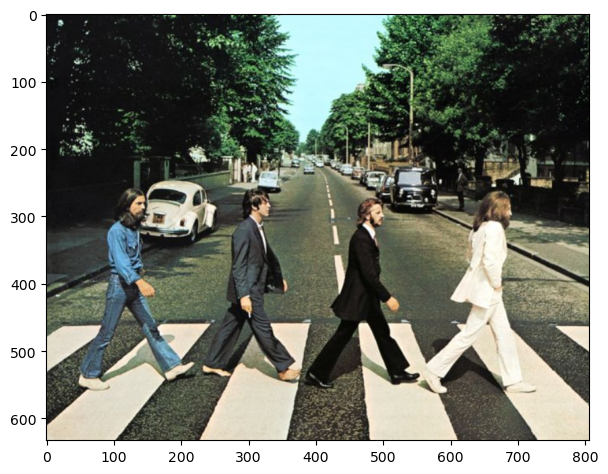

In [4]:
import cv2

cv2_image = cv2.imread('./data/beatles01.jpg') # BGR
cv2.imwrite('./data/beatles02_cv.jpg', cv2_image) # BGR -> RGB
print('cv_image type:', type(cv2_image), ' cv_image shape:', cv2_image.shape)

# beatles02_cv.jpg는 RGB 이미지
# plt.imread()는 RGB 이미지를 RGB 형태의 numpy array로 반환
img = plt.imread('./data/beatles02_cv.jpg')

print('img type:', type(img), ' img shape:', img.shape)

plt.figure(figsize=(7, 7))
plt.imshow(img)
plt.show()

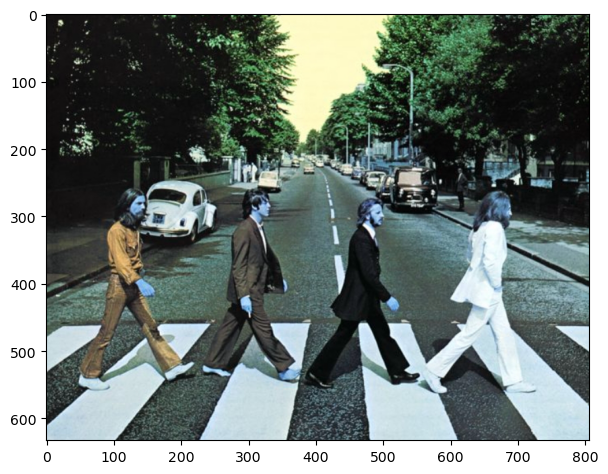

In [5]:
# imread()는 RGB를 BGR로 변환함을 알 수 있음
cv2_image = cv2.imread('./data/beatles01.jpg')

plt.figure(figsize=(7, 7))
plt.imshow(cv2_image)
plt.show()

### OpenCV 영상 처리

*OpenCV는 간편하게 비디오를 영상처리 할 수 있는 API 제공*
- **VideoCapture 클래스**
    - Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공
    - `cv2.VideoCapture(path)`: 생성 인자로 입력 video 파일 위치를 받아 객체 생성
    - `hasFrame, img_frame = VideoCapture객체.read()`: 마지막 Frame까지 차례로 Frame 읽음
        - img_frame: 하나씩 읽어온 개별 frame
        - hasFrame: img_frame 다음의 frame의 존재 여부
    - `VideoCapture객체.get()`: 입력 Video 파일의 다양한 속성을 가져올 수 있음
        - cv2.CAP_PROP_FRAME_WIDTH : 프레임 폭
        - cv2.CAP_PROP_FRAME_HEIGHT : 프레임 높이
        - cv2.CAP_PROP_FPS : 프레임 초당 프레임 수
        - cv2.CAP_PROP_FOURCC : 동영상 파일 코덱 문자
        
- **VideoWriter 클래스**
    - 읽어들인 개별 Frame을 동영상 파일로 Write 수행
    - `codec = cv2.VideoWriter_fourcc(*'...')`: write시 특정 format으로 동영상 Encoding 가능
    - `cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)`: 영상을 저장하기 위해서는 cv2.VideoWriter 객체 생성 필수
    - `_.write(frame)`: 읽어들인 개별 frame을 동영상 파일로 write하는 기능 제공
    - `_.release()`: video writer 닫기, 객체 자원 반납

**영상 다운로드**

In [11]:
!mkdir ./data
!wget -O ./data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4

mkdir: ./data: File exists
--2023-09-04 14:24:42--  https://github.com/chulminkw/DLCV/blob/master/data/video/FishnShark01.mp4
github.com (github.com) 해석 중... 20.200.245.247
다음으로 연결 중: github.com (github.com)|20.200.245.247|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 6490 (6.3K) [text/plain]
저장 위치: `./data/FishnShark01.mp4'

./data/FishnShark01 100%[===================>]   6.34K  --.-KB/s    /  0.001s  

2023-09-04 14:24:42 (6.25 MB/s) - `./data/FishnShark01.mp4' 저장함 [6490/6490]



**영상 처리**

In [ ]:
import cv2

video_input_path = './data/Night_Day_Chase.mp4'
video_output_path = './data/Night_Day_Chase_out.mp4'

cap = cv2.VideoCapture(video_input_path)
codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) #(200, 400) -> (열, 행)
vid_fps = cap.get(cv2.CAP_PROP_FPS )
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)

In [ ]:
import time

green_color=(0, 255, 0)
red_color=(0, 0, 255)

start = time.time()
index=0
while True:
    # img_frame은 object detectioin을 할 대상
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    print('frame :', index, '처리 완료')

    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = "frame:{}".format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)

    vid_writer.write(img_frame)

print('write 완료 시간:', round(time.time()-start,4))
vid_writer.release()
cap.release()